In [1]:
pip install -q kaggle

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 75 bytes


In [3]:
! kaggle datasets download -d "abdulhasibuddin/malayakew-plant-leaf-dataset"

 97% 398M/409M [00:02<00:00, 115MB/s]
100% 409M/409M [00:02<00:00, 170MB/s]


In [4]:
!unzip /content/malayakew-plant-leaf-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: MK/D2/train_patch/Class43/Class43(6)R270_00156.jpg  
  inflating: MK/D2/train_patch/Class43/Class43(6)R270_00159.jpg  
  inflating: MK/D2/train_patch/Class43/Class43(6)R270_00160.jpg  
  inflating: MK/D2/train_patch/Class43/Class43(6)R315_00163.jpg  
  inflating: MK/D2/train_patch/Class43/Class43(6)R315_00164.jpg  
  inflating: MK/D2/train_patch/Class43/Class43(6)R315_00166.jpg  
  inflating: MK/D2/train_patch/Class43/Class43(6)R315_00168.jpg  
  inflating: MK/D2/train_patch/Class43/Class43(6)R315_00170.jpg  
  inflating: MK/D2/train_patch/Class43/Class43(6)R315_00176.jpg  
  inflating: MK/D2/train_patch/Class43/Class43(6)R315_00177.jpg  
  inflating: MK/D2/train_patch/Class43/Class43(6)R315_00180.jpg  
  inflating: MK/D2/train_patch/Class43/Class43(6)R315_00182.jpg  
  inflating: MK/D2/train_patch/Class43/Class43(6)R315_00187.jpg  
  inflating: MK/D2/train_patch/Class43/Class43(6)R315_00188.jpg  
  inflating: MK/D2/train_

In [5]:
import numpy as np
import pandas as pd

In [6]:
import os
for dirname, _, filenames in os.walk('/content/MK'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/MK/D2/train_patch/Class34/Class34(10)R45_00028.jpg
/content/MK/D2/train_patch/Class34/Class34(2)R180_00242.jpg
/content/MK/D2/train_patch/Class34/Class34(21)R135_00367.jpg
/content/MK/D2/train_patch/Class34/Class34(4)R135_00501.jpg
/content/MK/D2/train_patch/Class34/Class34(18)R315_00281.jpg
/content/MK/D2/train_patch/Class34/Class34(10)R180_00030.jpg
/content/MK/D2/train_patch/Class34/Class34(16)R0_00138.jpg
/content/MK/D2/train_patch/Class34/Class34(21)R270_00282.jpg
/content/MK/D2/train_patch/Class34/Class34(12)R0_00059.jpg
/content/MK/D2/train_patch/Class34/Class34(21)R90_00286.jpg
/content/MK/D2/train_patch/Class34/Class34(2)R225_00330.jpg
/content/MK/D2/train_patch/Class34/Class34(21)R180_00271.jpg
/content/MK/D2/train_patch/Class34/Class34(16)R225_00225.jpg
/content/MK/D2/train_patch/Class34/Class34(18)R270_00190.jpg
/content/MK/D2/train_patch/Class34/Class34(20)R0_00269.jpg
/content/MK/D2/train_patch/Class34/Class34(21

In [7]:
import os
import numpy as np
from PIL import Image

In [8]:
def load_images(root_folder, folder_names, target_size=(224,224)):
    # Lists to store image data (X) and labels (y)
    X = []  # Image data
    y = []  # Corresponding labels

    label_counter = 0  # Counter to assign labels to different classes

    # Loop through each folder representing a class
    for folder_name in folder_names:
        # Construct the path for the current folder
        folder_path = os.path.join(root_folder, folder_name)

        # Check if the folder path exists and is a directory
        if os.path.isdir(folder_path):
            # For each image in the folder
            for filename in sorted(os.listdir(folder_path)):
                # Construct the full path of the image file
                img_path = os.path.join(folder_path, filename)
                # Open the image using PIL
                with Image.open(img_path) as img:
                    # Resize the image to the target size
                    img_resized = img.resize(target_size)

                    # Convert the image to a NumPy array
                    img_array = np.array(img_resized)

                    # Append the image array to the X list
                    X.append(img_array)

                    # Append the corresponding label to the y list
                    y.append(label_counter)

            # Increment the label counter for the next class
            label_counter += 1

    # Convert the lists of images and labels to NumPy arrays and return
    return np.array(X), np.array(y)

In [30]:
root_folder = '/content/MK/D1/train'
selected_folders = ['Class (12)', 'Class (19)']
selected_folders2= ['Class13', 'Class20']
X_train, y_train = load_images(root_folder, selected_folders)
root_folder = '/content/MK/D1/test'
root_folder2= '/content/MK/D2/test_patch'
X_test, y_test = load_images(root_folder, selected_folders)
X_test2, y_test2 = load_images(root_folder2, selected_folders2)

In [31]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)
print("X_test2", X_test2.shape)
print("y_test2", y_test2.shape)

X_train (104, 224, 224, 3)
y_train (104,)
X_test (24, 224, 224, 3)
y_test (24,)
X_test2 (400, 224, 224, 3)
y_test2 (400,)


In [32]:
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
y_test2 = np.array(y_test2)
X_test2 = np.array(X_test2)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (104, 224, 224, 3)
X_test Shape:  (24, 224, 224, 3)
y_train Shape:  (104,)
y_test Shape:  (24,)


In [33]:
X_train=X_train/255.0
X_test=X_test/255.0
X_test2=X_test2/255.0

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    # Your data augmentation parameters
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant'
)


# Function to apply augmentation twice to each dataset
def augment_dataset(dataset):
    augmented_data = []
    for img in dataset:
        img = np.expand_dims(img, axis=0)  # Expanding dimensions for batch size
        for _ in range(6):  # Apply augmentation twice
            seed = np.random.randint(0, 1000)  # Different seed for each pass
            for batch in datagen.flow(img, batch_size=1, seed=seed):
                augmented_data.append(np.squeeze(batch))  # Remove the batch dimension
                break  # Stop the loop after one augmented image
    return np.array(augmented_data)
X_train_augmented = augment_dataset(X_train)
y_train_augmented = np.repeat(y_train,6, axis=0)
X_test_augmented = augment_dataset(X_test)
y_test_augmented = np.repeat(y_test,6, axis=0)



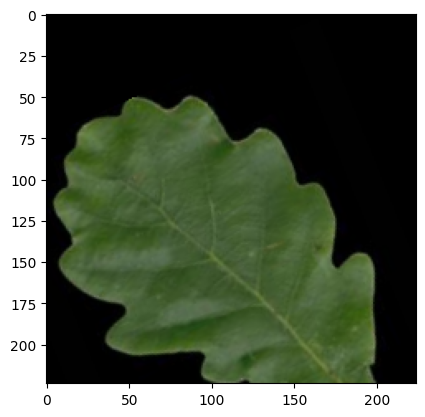

In [35]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(X_train_augmented[5])
plt.show()

In [36]:
# Check the shapes of augmented datasets
print("X_train_augmented shape:", X_train_augmented.shape)
print("y_train_augmented shape:", y_train_augmented.shape)

print("X_test_augmented shape:", X_test_augmented.shape)
print("y_test_augmented shape:", y_test_augmented.shape)

X_train_augmented shape: (624, 224, 224, 3)
y_train_augmented shape: (624,)
X_test_augmented shape: (144, 224, 224, 3)
y_test_augmented shape: (144,)


In [37]:
from sklearn.utils import shuffle

# Combine original data with augmented data
X_train_combined = np.concatenate((X_train, X_train_augmented))
y_train_combined = np.concatenate((y_train, y_train_augmented))

X_test_combined = np.concatenate((X_test, X_test_augmented))
y_test_combined = np.concatenate((y_test, y_test_augmented))

# Shuffle the combined data
X_train_combined, y_train_combined = shuffle(X_train_combined, y_train_combined, random_state=42)
X_test_combined, y_test_combined = shuffle(X_test_combined, y_test_combined, random_state=42)

In [38]:
print(y_train_combined.shape)
print(y_test_combined.shape)

(728,)
(168,)


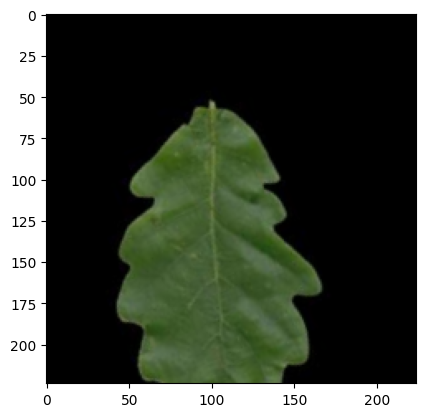

In [39]:
plt.imshow(X_test_combined[1])
# plt.imshow(X_train_combined[10])
plt.show()
#X_train_combined


In [22]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.0 MB/s eta 0:00:00


In [40]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16,Xception,VGG19,ResNet50
from keras.datasets import cifar10
from keras.applications.vgg16 import preprocess_input
from keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

# Choose the last four layers to be trainable
# for layer in base_model.layers[-4:]:
#     layer.trainable = True

# Create a new model and add the pre-trained base
model = Sequential()
model.add(base_model)

# Add custom layers for classification
model.add(Flatten())

# model.add(Dense(1024, activation='elu'))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation='elu'))
# model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))

model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 100)               10035300  
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 33623113 (128.26 MB)
Trainable params: 10035401 (38.28 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [41]:
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import backend as K
metrics = [
        'accuracy',
        tf.keras.metrics.AUC(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.SpecificityAtSensitivity(0.5),
        tf.keras.metrics.SensitivityAtSpecificity(0.5),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.F1Score()]

In [43]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

In [44]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 5:
        lr *= 1e-1
    if epoch > 10:
        lr *= 1e-1
    return lr

# Use the LearningRateScheduler callback during model training
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    LearningRateScheduler(lr_schedule)
]
history = model.fit(X_train_combined, y_train_combined.astype('float32'), epochs=10,batch_size=32,validation_split=0.3,callbacks=callbacks)

Epoch 1/10
16/16 [==============================] - 200s 12s/step - loss: 4.1893 - accuracy: 0.4971 - auc_1: 0.4907 - recall_1: 0.2411 - precision_1: 0.4880 - specificity_at_sensitivity_1: 0.4141 - sensitivity_at_specificity_1: 0.4822 - false_negatives_1: 192.0000 - false_positives_1: 64.0000 - true_negatives_1: 192.0000 - true_positives_1: 61.0000 - f1_score: 0.6640 - val_loss: 0.6931 - val_accuracy: 0.5068 - val_auc_1: 0.5000 - val_recall_1: 1.0000 - val_precision_1: 0.5068 - val_specificity_at_sensitivity_1: 0.0000e+00 - val_sensitivity_at_specificity_1: 0.0000e+00 - val_false_negatives_1: 0.0000e+00 - val_false_positives_1: 108.0000 - val_true_negatives_1: 0.0000e+00 - val_true_positives_1: 111.0000 - val_f1_score: 0.6727 - lr: 0.0010
Epoch 2/10
16/16 [==============================] - 185s 12s/step - loss: 0.6932 - accuracy: 0.4971 - auc_1: 0.5000 - recall_1: 1.0000 - precision_1: 0.4971 - specificity_at_sensitivity_1: 0.0000e+00 - sensitivity_at_specificity_1: 0.0000e+00 - false_

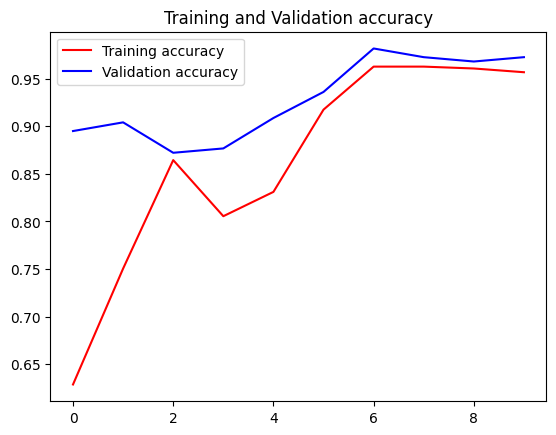

<Figure size 640x480 with 0 Axes>

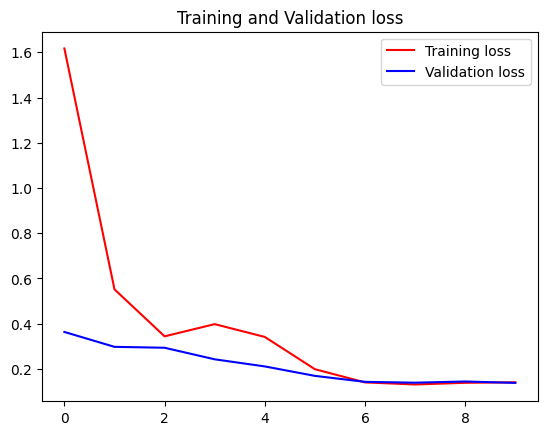

<Figure size 640x480 with 0 Axes>

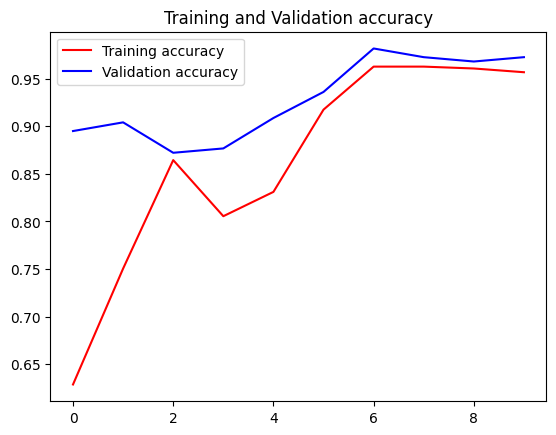

<Figure size 640x480 with 0 Axes>

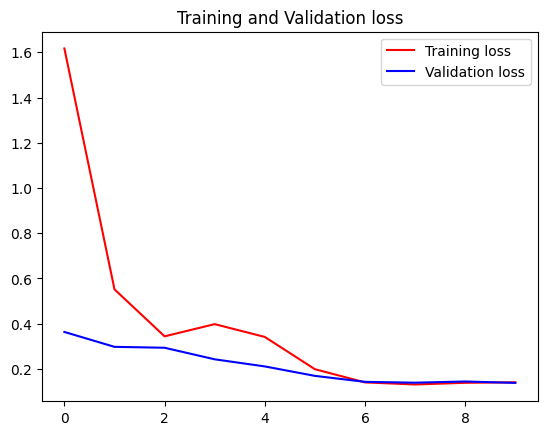

<Figure size 640x480 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label="Training accuracy")
plt.plot(epochs,val_acc,'b',label="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [29]:
model.evaluate(X_test_combined,y_test_combined.astype('float32'))

6/6 [==============================] - 37s 5s/step - loss: 0.1322 - accuracy: 0.9762 - auc: 0.9981 - recall: 0.9881 - precision: 0.9651 - specificity_at_sensitivity: 1.0000 - sensitivity_at_specificity: 1.0000 - false_negatives: 1.0000 - false_positives: 3.0000 - true_negatives: 81.0000 - true_positives: 83.0000 - f1_score: 0.6667


[0.13219372928142548,
 0.976190447807312,
 0.9980867505073547,
 0.988095223903656,
 0.9651162624359131,
 1.0,
 1.0,
 1.0,
 3.0,
 81.0,
 83.0,
 array([0.6666667], dtype=float32)]